In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("Passenger_Satisfaction.csv")

In [6]:
df.shape

(103904, 25)

In [7]:
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
df.columns = df.columns.str.strip().str.replace(" ", '_')

In [16]:
df.isna().sum()

Unnamed:_0                             0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction    

In [18]:
df['Arrival_Delay_in_Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [20]:
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9156\2413664910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean(), inplace=True)


In [22]:
df.isna().sum()

Unnamed:_0                           0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [24]:
columns_continuous = ['Unnamed:_0','id', 'Age', 'Flight_Distance', 'Inflight_wifi_service' , 'Departure/Arrival_time_convenient', 
                      'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',	'Online_boarding',	'Seat_comfort',	
                      'Inflight_entertainment', 'On-board_service',	'Leg_room_service', 'Baggage_handling', 'Checkin_service',	
                      'Inflight_service',	'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
columns_categorical = ['Gender', 'Customer_Type', 'Type_of_Travel',	'Class', 'satisfaction']

In [26]:
columns_categorical 

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']

In [28]:
for col in columns_categorical:
    print(col, "-->", df[col].unique())

Gender --> ['Male' 'Female']
Customer_Type --> ['Loyal Customer' 'disloyal Customer']
Type_of_Travel --> ['Personal Travel' 'Business travel']
Class --> ['Eco Plus' 'Business' 'Eco']
satisfaction --> ['neutral or dissatisfied' 'satisfied']


In [30]:
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': '0',
    'neutral or dissatisfied': '1'
})

In [32]:
df['satisfaction'] = df['satisfaction'].astype(int)

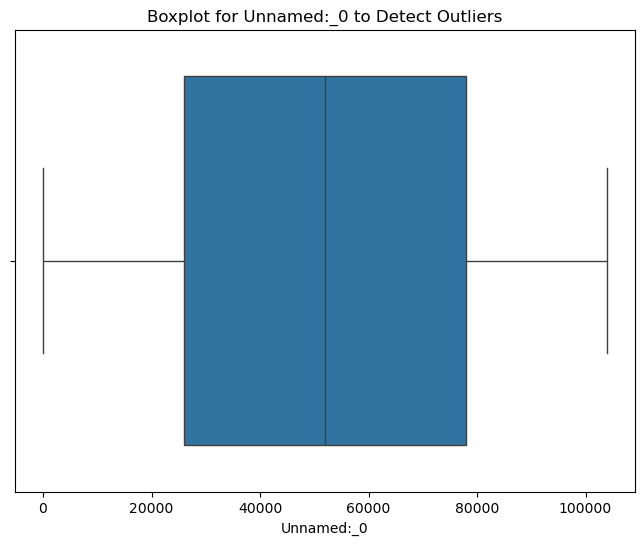

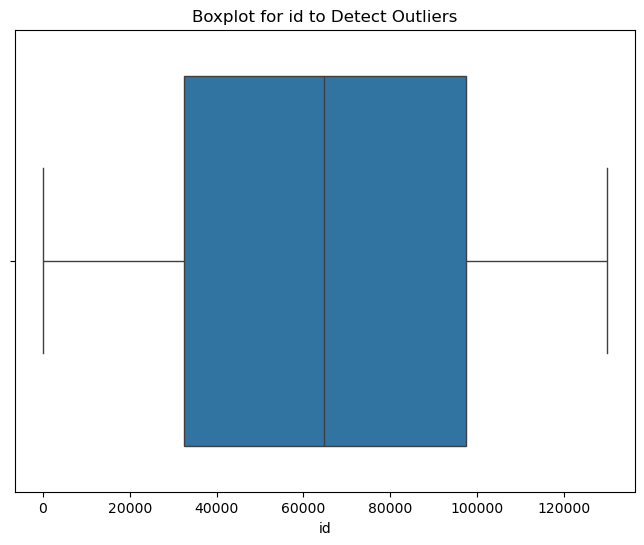

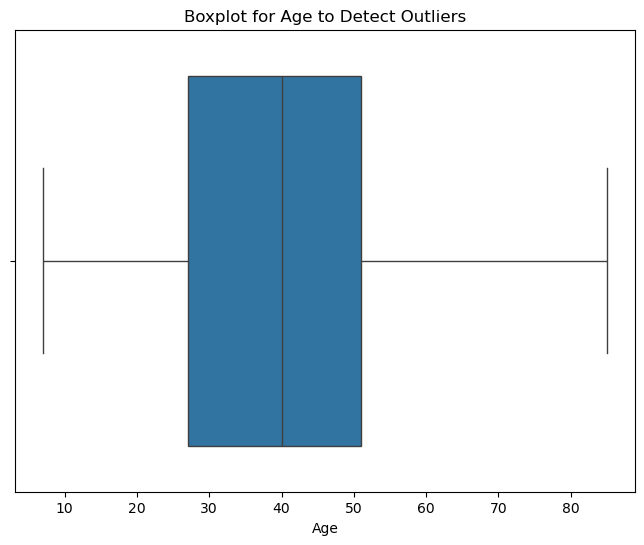

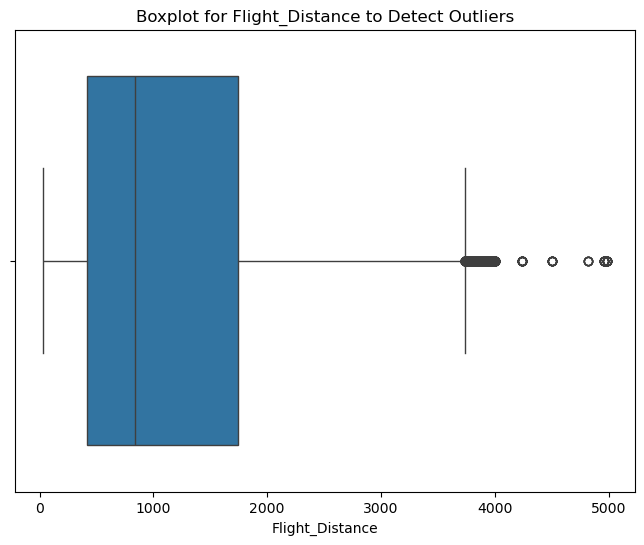

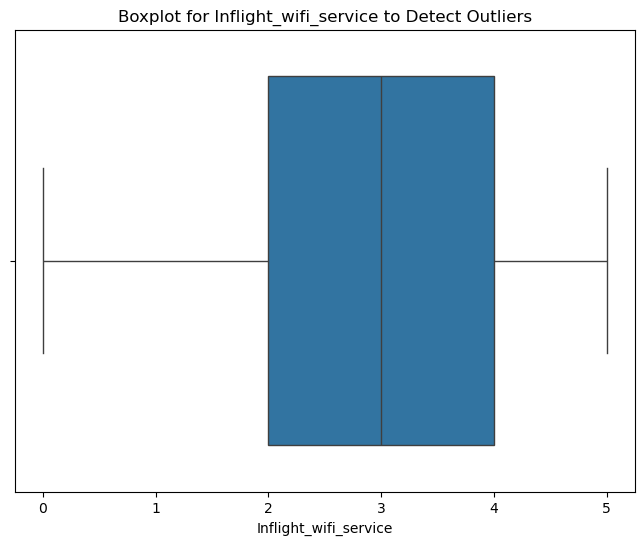

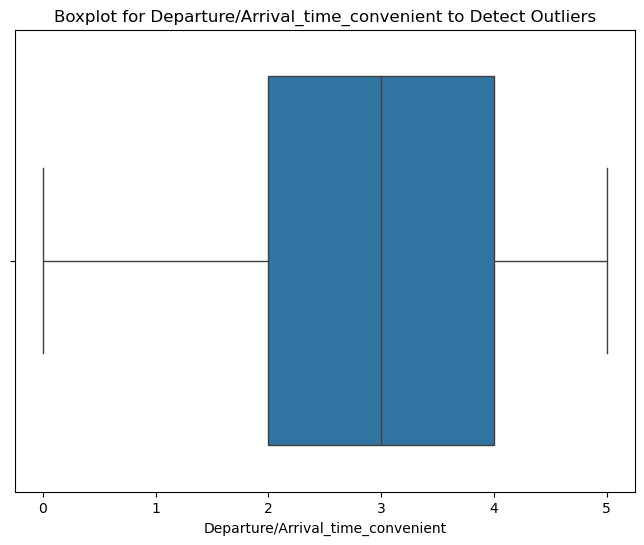

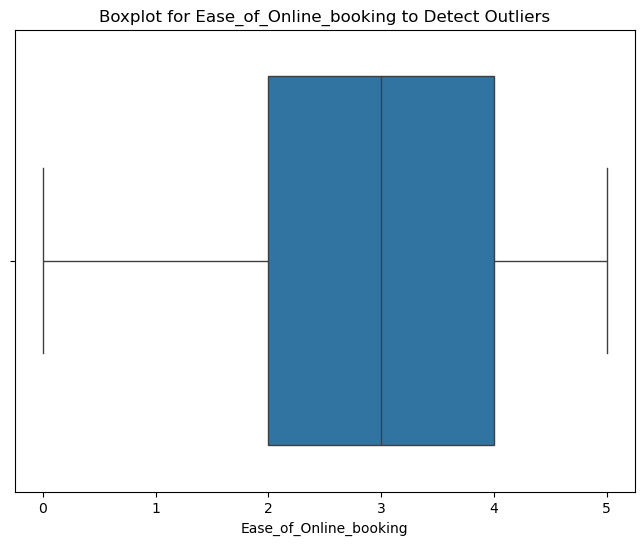

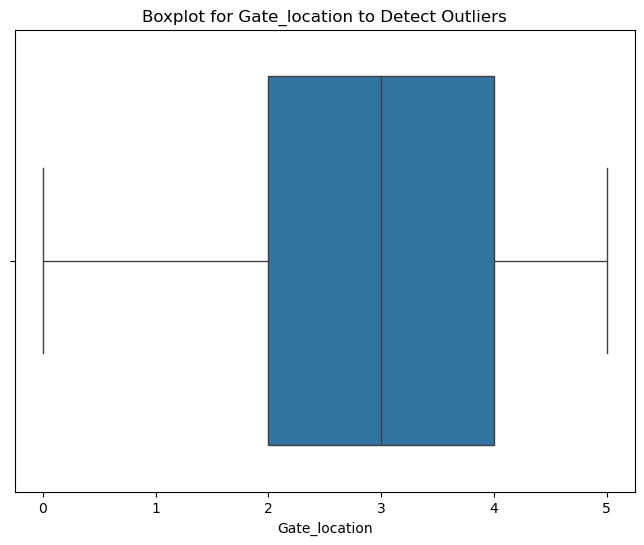

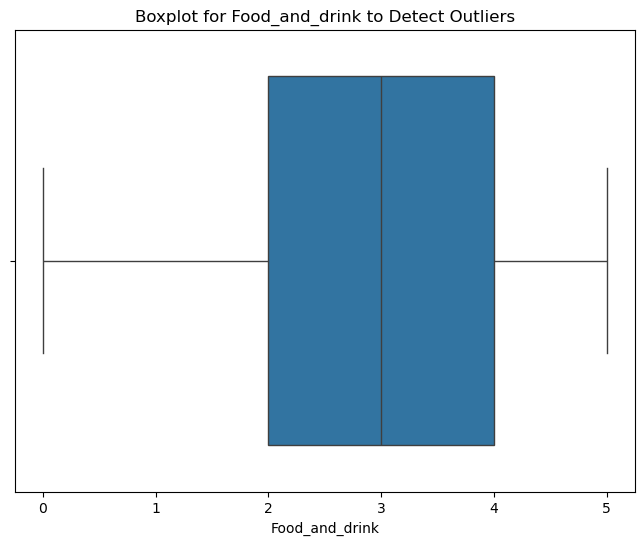

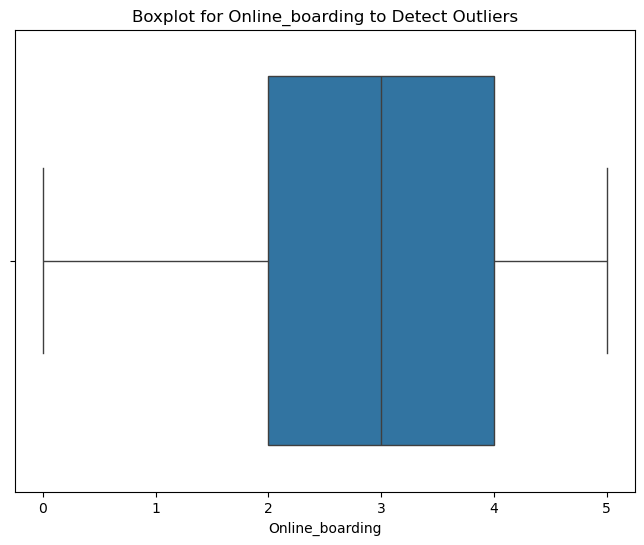

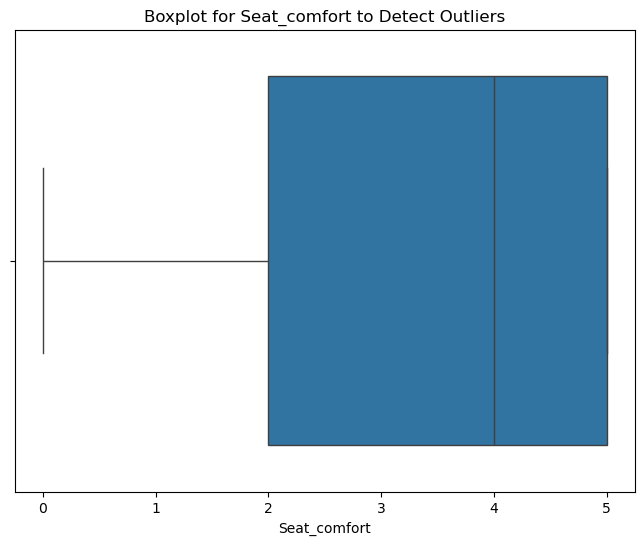

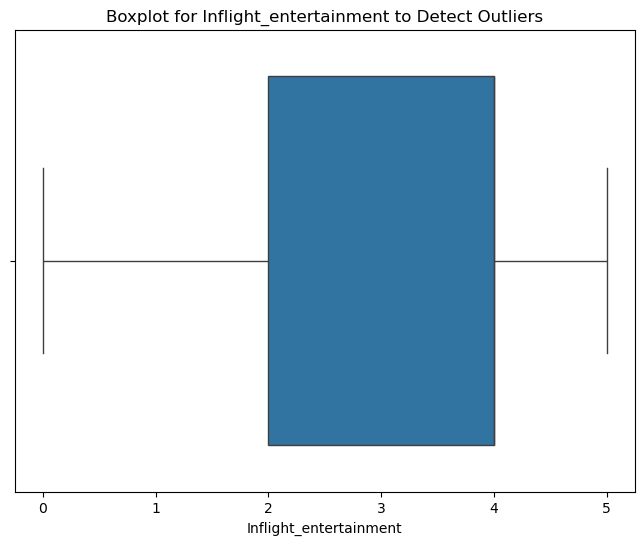

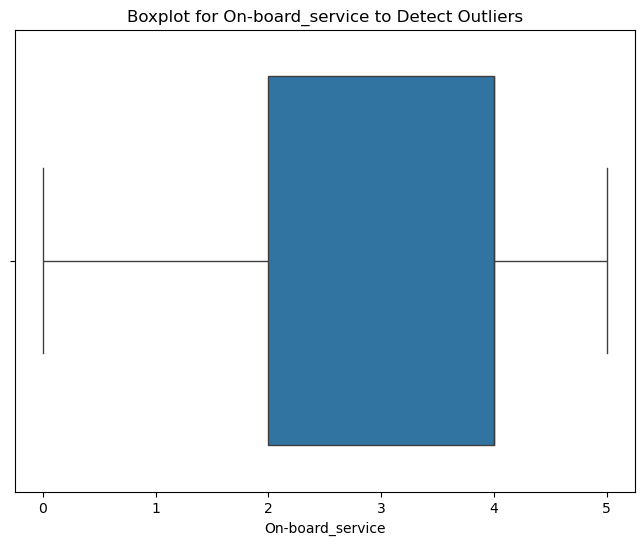

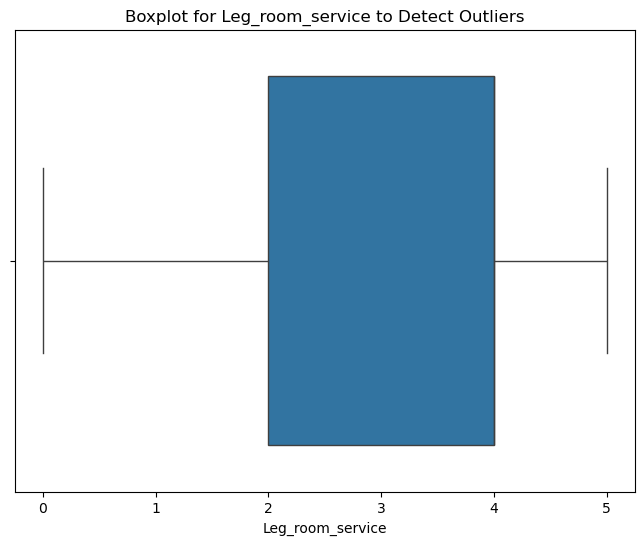

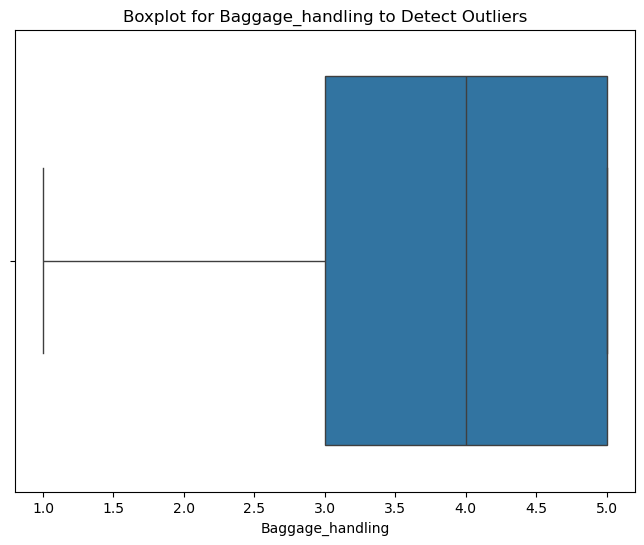

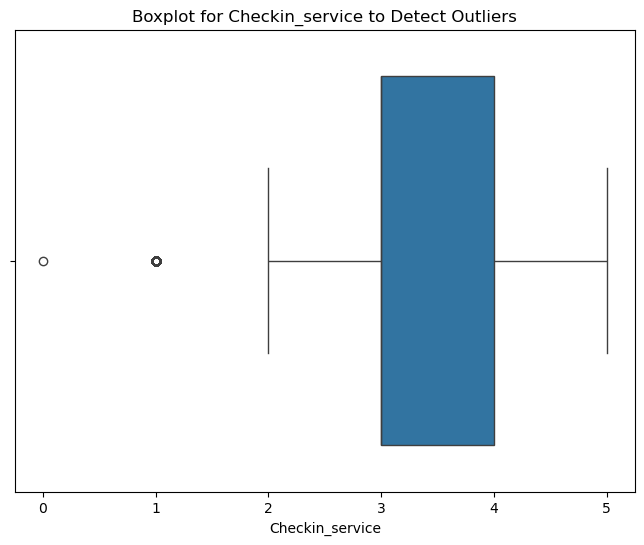

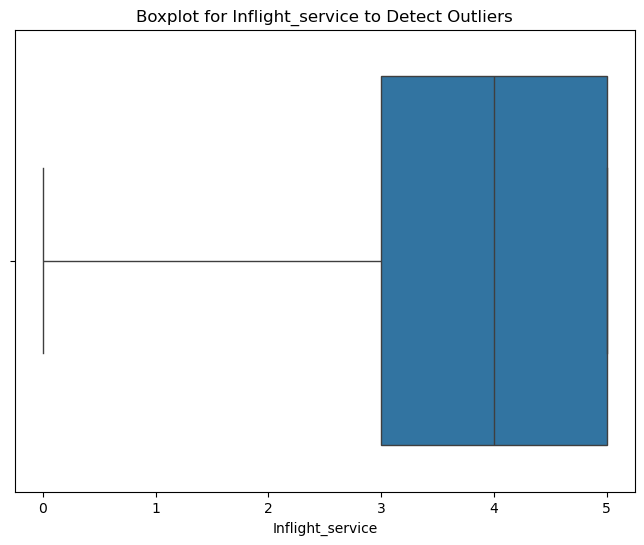

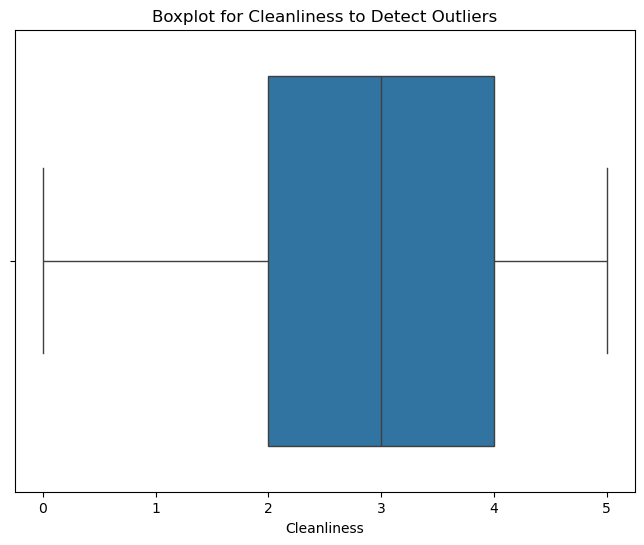

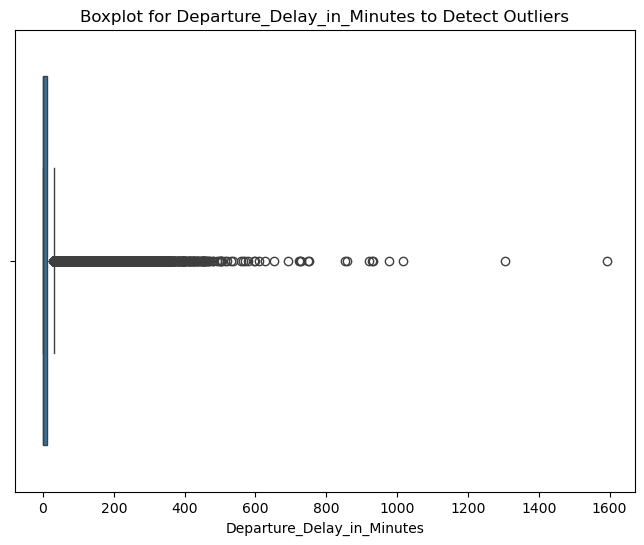

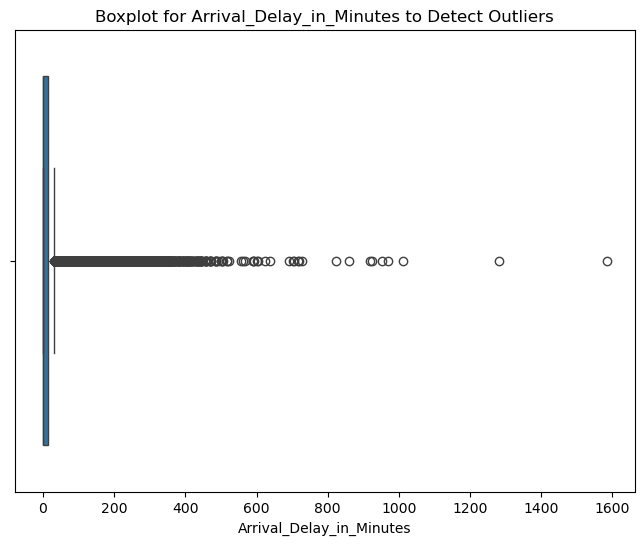

In [48]:
# detect outliers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with continuous columns
# Replace 'column1', 'column2', etc., with the actual column names you're interested in
columns_continuous = ['Unnamed:_0','id', 'Age', 'Flight_Distance', 'Inflight_wifi_service' , 'Departure/Arrival_time_convenient', 
                      'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',	'Online_boarding',	'Seat_comfort',	
                      'Inflight_entertainment', 'On-board_service',	'Leg_room_service', 'Baggage_handling', 'Checkin_service',	
                      'Inflight_service',	'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

# Visualize the boxplot for each continuous column
for column in columns_continuous:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column} to Detect Outliers')
    plt.xlabel(column)
    plt.show()


__Exploratory data analysis__

In [37]:
#age  column
df.groupby("satisfaction")['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,45025.0,41.750583,12.767833,7.0,32.0,43.0,51.0,85.0
1,58879.0,37.566688,16.459825,7.0,25.0,36.0,50.0,85.0


In [39]:
df.satisfaction.value_counts()

satisfaction
1    58879
0    45025
Name: count, dtype: int64

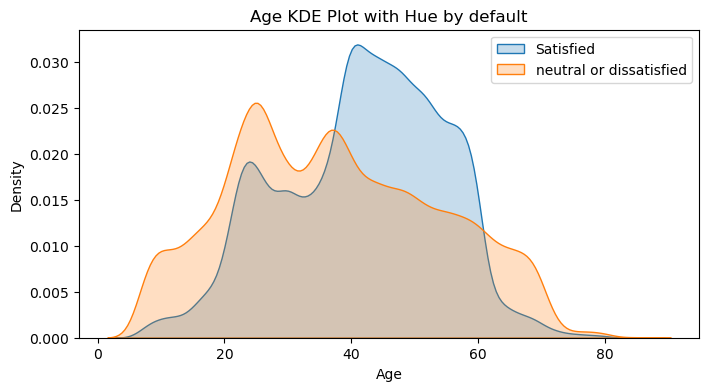

In [41]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Age'][df['satisfaction'] == 0], fill=True, label='Satisfied')
sns.kdeplot(df['Age'][df['satisfaction'] == 1], fill=True, label = 'neutral or dissatisfied')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**KDE for all the column**

In [50]:
columns_continuous

['Unnamed:_0',
 'id',
 'Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

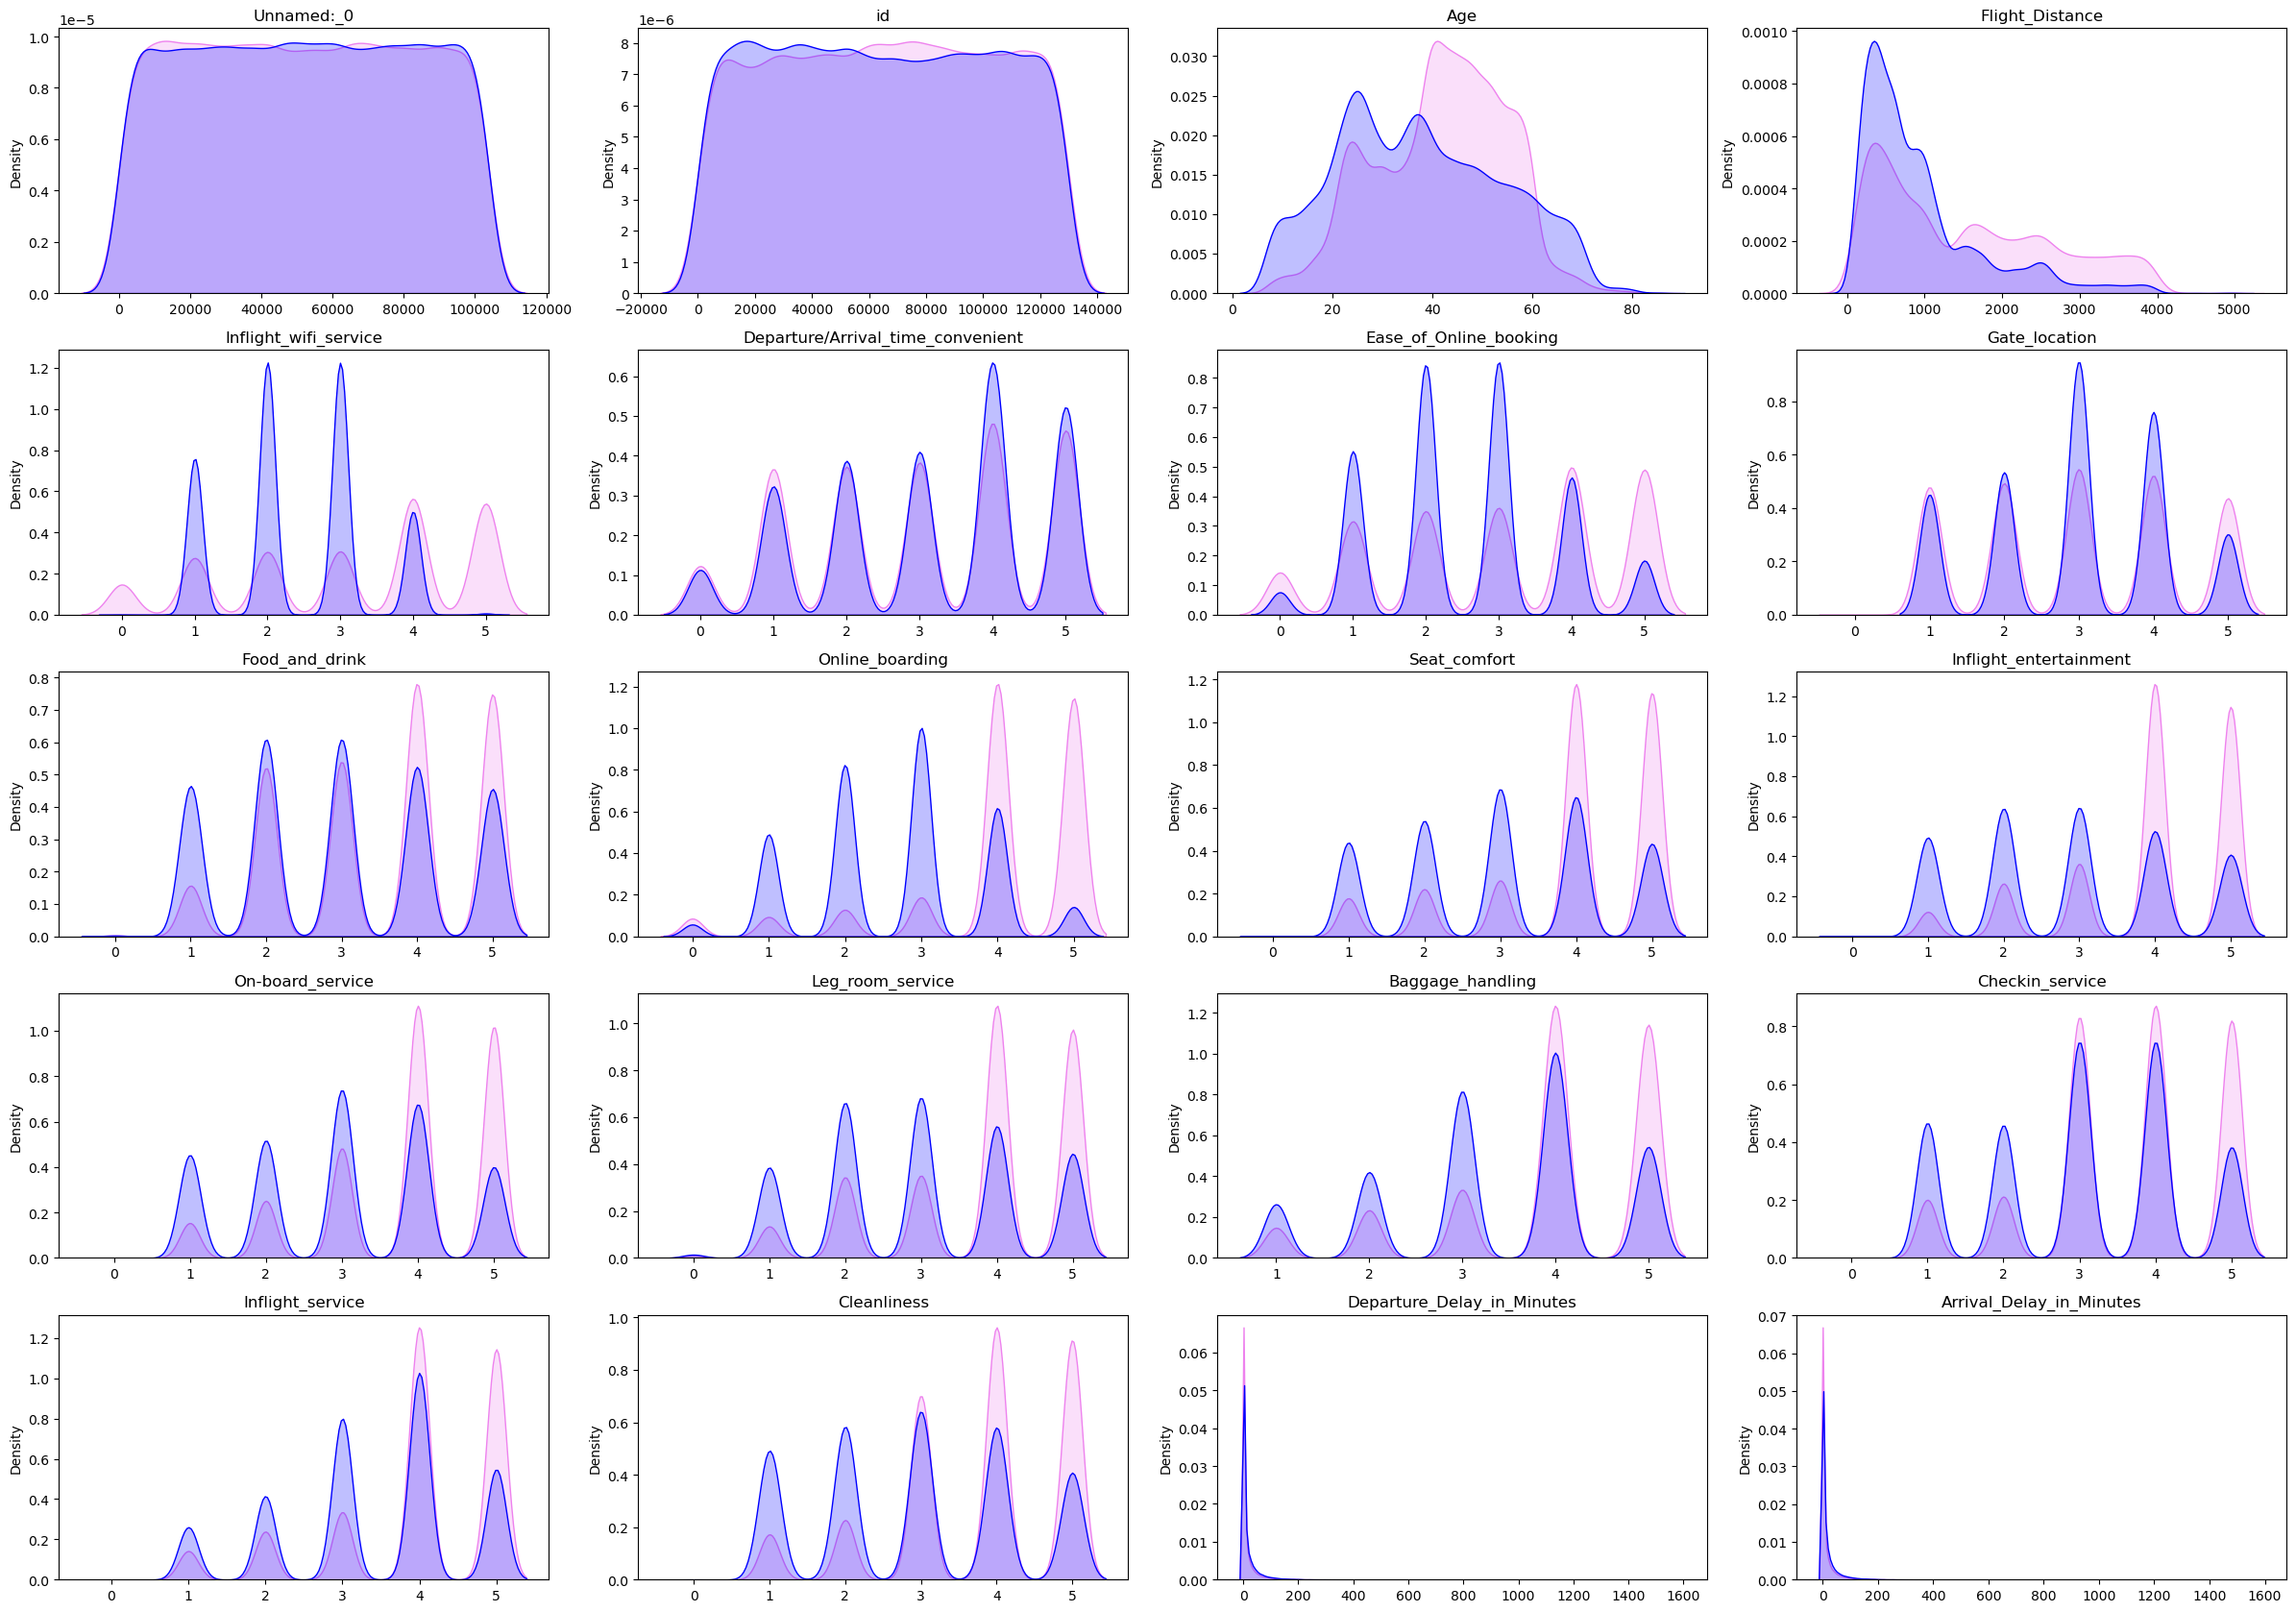

In [62]:
palette = {0: "violet", 1: "blue"}
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df[col][df['satisfaction']==0], fill=True, label='Satisfied', color=palette[0])
    sns.kdeplot(df[col][df['satisfaction']==1], fill=True, label='neutral or dissatisfied', color=palette[1])
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

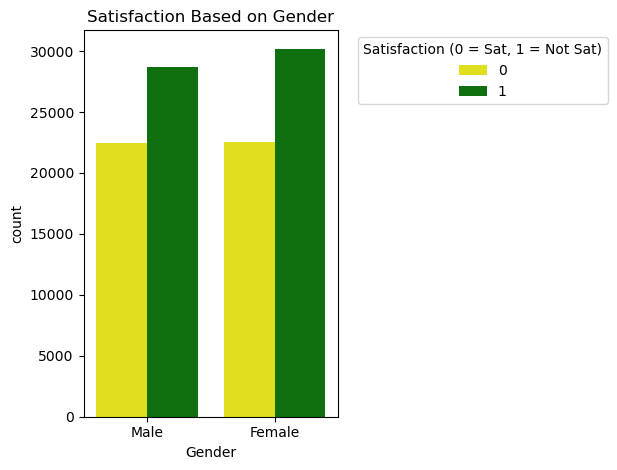

In [72]:

# Custom color palette: e.g., green for satisfied (0), red for not satisfied (1)
palette = {0: "yellow", 1: "green"}

sns.countplot(x='Gender', hue='satisfaction', data=df, palette=palette)
plt.title('Satisfaction Based on Gender')
plt.legend(title='Satisfaction (0 = Sat, 1 = Not Sat)',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()#adjest layout to fit everything
plt.show()


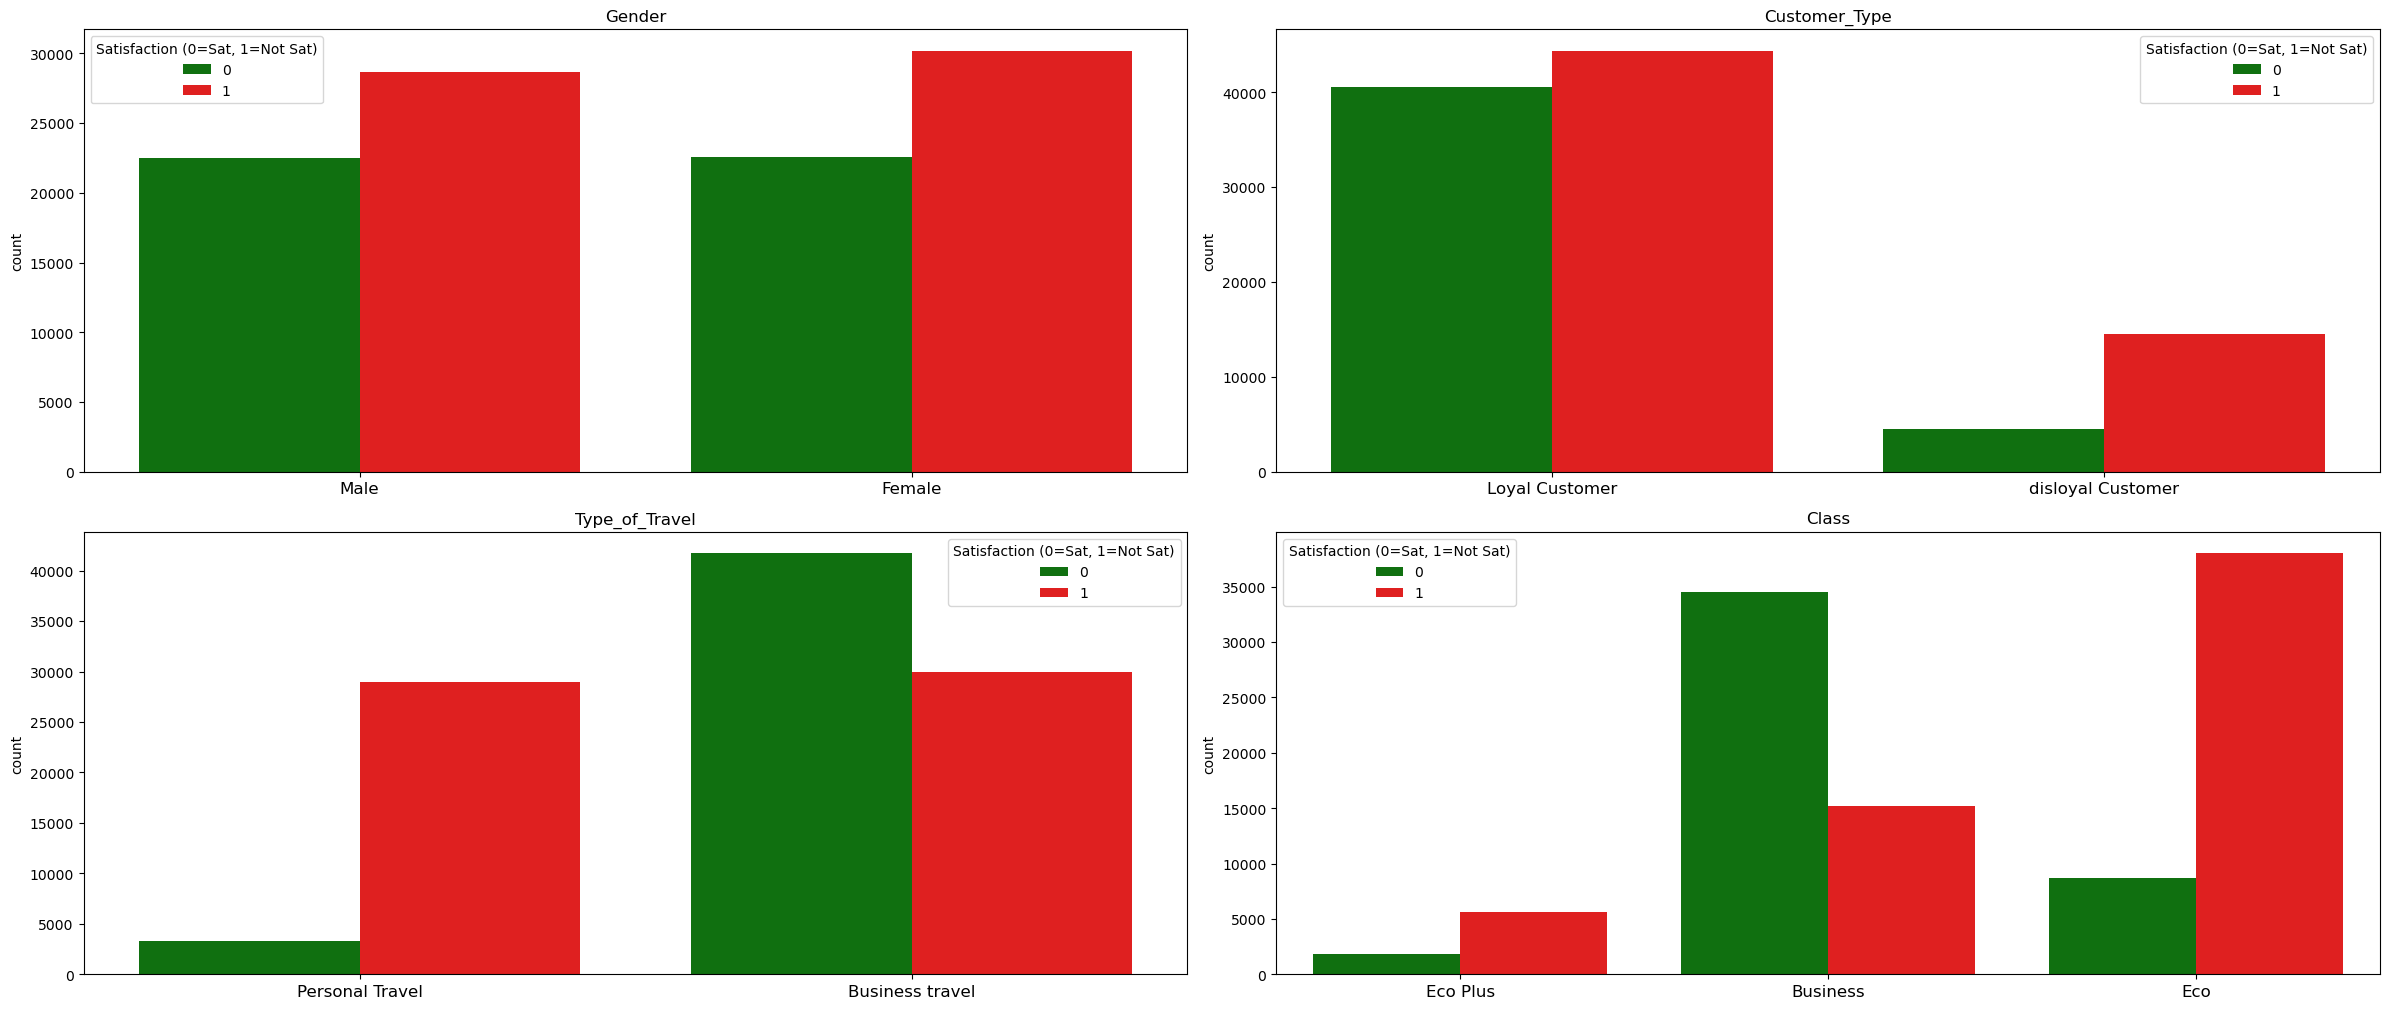

In [70]:
palette = {0: "green", 1: "red"}
plt.figure(figsize=(24, 20))  # Width, height in inches

columns_categorical = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

for i, col in enumerate(columns_categorical):
    plt.subplot(4, 2, i+1)  # 1 row, 3 columns, ith subplot
    sns.countplot(x= col, hue='satisfaction', data=df, palette=palette)
    plt.legend(title='Satisfaction (0=Sat, 1=Not Sat)')
    plt.title(col)        
    plt.xlabel('')  
    plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()

**Remove columns that are just unique ids and don't have influence on target¶**(feature selection)

In [74]:
df.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [76]:
df = df.drop(['Unnamed:_0', 'id'],axis="columns")
df = df.drop(['Gender'],axis="columns")

In [78]:
df.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [80]:
df.select_dtypes(['int64', 'float64']).columns

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

In [82]:
numeric_columns = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

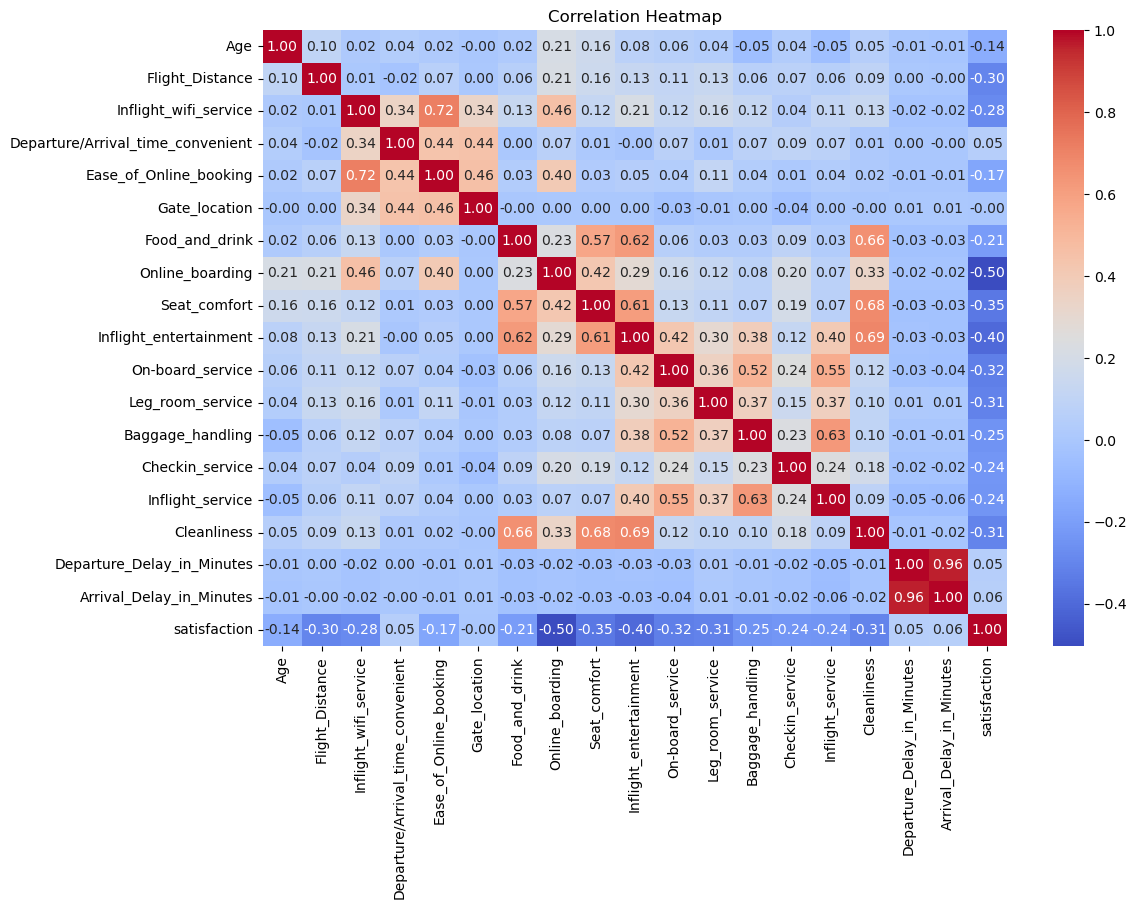

In [84]:
plt.figure(figsize=(12, 8))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

__Dropped 'Departure_Delay_in_Minutes' Due to Multicollinearity with 'Arrival_Delay_in_Minutes__

In [91]:
df = df.drop('Departure_Delay_in_Minutes', axis = 'columns')

In [93]:
df.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Arrival_Delay_in_Minutes', 'satisfaction'],
      dtype='object')

In [95]:
df.to_csv('passenger.output', index=False)

__Use minmax Scaler__

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
df_train = df.copy()

In [106]:
df_train

,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Arrival_Delay_in_Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,...,5,5,4,3,4,4,5,5,18.0,1
1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,...,1,1,1,5,3,1,4,1,6.0,1
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0.0,0
3,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,...,2,2,2,5,3,1,4,2,9.0,1
4,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,...,2,2,3,1,4,2,3,2,0.0,1
103900,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0.0,0
103901,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,...,5,4,3,2,4,5,5,4,14.0,1
103902,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,...,1,1,4,5,1,5,4,1,0.0,1


In [110]:
cols = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Arrival_Delay_in_Minutes']

scaler = MinMaxScaler()

df_train[cols] = scaler.fit_transform(df_train[cols])
df_train.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Arrival_Delay_in_Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.415124,0.233935,0.545937,0.612059,0.551380,0.595377,0.640426,0.650075,0.687879,0.671632,0.676473,0.670211,0.657958,0.660858,0.728086,0.657270,0.009582,0.566667
std,0.193782,0.201363,0.265566,0.305015,0.279786,0.255524,0.265907,0.269902,0.263818,0.266598,0.257671,0.263121,0.295226,0.253079,0.235133,0.262455,0.024395,0.495538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.163974,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,1.000000
75%,0.564103,0.345719,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.008207,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df_train = pd.get_dummies(df_train, columns = ['Customer_Type', 'Type_of_Travel', 'Class'], drop_first=True, dtype=int)#feature encoding

__MODEL TRAINING__

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_train.drop('satisfaction', axis = 1)
y = df_train['satisfaction']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model = LogisticRegression(C = 0.1, solver='liblinear', max_iter=500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     11299
           1       0.88      0.90      0.89     14677

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



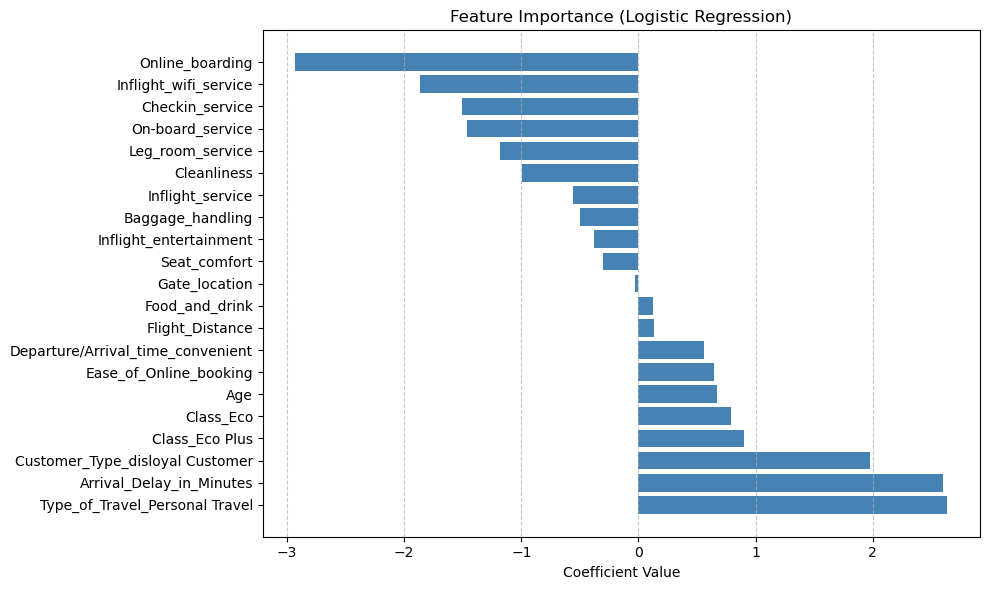

In [117]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Coefficient'])

# Sort the coefficients in descending order (optional)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [119]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11299
           1       0.95      0.98      0.97     14677

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



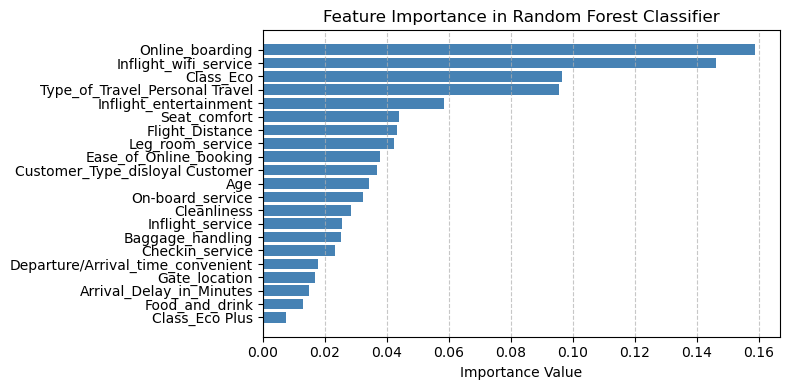

In [123]:
feature_importance = model.feature_importances_

# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Importance'])

# Sort the coefficients for better visualization
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df.index, feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.title('Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11299
           1       0.94      0.96      0.95     14677

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



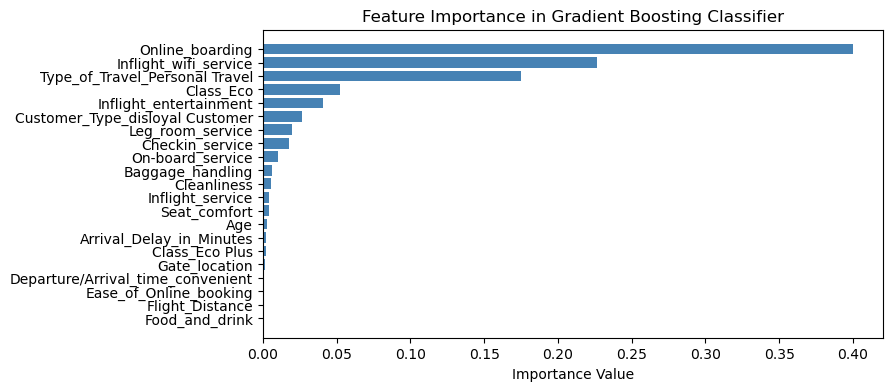

In [127]:
feature_importance = model.feature_importances_

# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Importance'])

# Sort the coefficients for better visualization
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df.index, feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint
import time

# Set up cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Parameter distributions
lr_param_dist = {
    'classifier__C': uniform(0.001, 1),
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': randint(10, 100)
}

rf_param_dist = {
    'classifier__n_estimators': randint(50, 100),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None]
}

gb_param_dist = {
    'classifier__n_estimators': randint(50, 100),
    'classifier__learning_rate': uniform(0.01, 0.5),
    'classifier__max_depth': randint(3, 10),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Create pipelines
def model_pipeline(model, scale=False):
    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    steps.append(('classifier', model))
    return Pipeline(steps)

pipelines = {
    'Logistic Regression': (model_pipeline(LogisticRegression(random_state=42), scale=True), lr_param_dist),
    'Random Forest': (model_pipeline(RandomForestClassifier(random_state=42)), rf_param_dist),
    'Gradient Boosting': (model_pipeline(GradientBoostingClassifier(random_state=42)), gb_param_dist)
}

# Run RandomizedSearchCV
n_iter_search = 5
best_models, scores, train_times = {}, {}, {}

for name, (pipe, params) in pipelines.items():
    print(f"\n{'='*20} {name} {'='*20}")
    start = time.time()

    random_search = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=n_iter_search,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    duration = time.time() - start
    train_times[name] = duration
    best_models[name] = random_search.best_estimator_

    y_pred = random_search.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

    print(f"\nBest Parameters: {random_search.best_params_}")
    print(f"Training Time: {duration:.2f} seconds")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



==================== Logistic Regression ====================
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'classifier__C': 0.7329939418114051, 'classifier__max_iter': 70, 'classifier__solver': 'liblinear'}
Training Time: 8.73 seconds
Test Accuracy: 0.8749
ROC AUC Score: 0.8704

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85     11299
           1       0.88      0.90      0.89     14677

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix:
 [[ 9446  1853]
 [ 1396 13281]]

==================== Random Forest ====================
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'classifier__max_depth': 13, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 9, 'classifier_

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset
X = df_train.drop('satisfaction', axis=1)
y = df_train['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear', max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store classification report and accuracy
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }
    
    # Print classification report
    print(f"\n{model_name} Classification Report:")
    print(results[model_name]['classification_report'])
    print(f"Accuracy: {accuracy:.4f}")

# Find the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     11299
           1       0.88      0.90      0.89     14677

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976

Accuracy: 0.8757

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11299
           1       0.96      0.98      0.97     14677

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9612

Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.9

__ML flow__

In [136]:
import mlflow
import mlflow.sklearn

In [138]:
models = [
    (
        "Logistic Regression", 
        {"C": 0.86, "solver": 'liblinear', "max_iter" : 33},
        LogisticRegression(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest Classifier", 
        {"max_depth": 14, "max_features": 'log2', "min_samples_leaf":6, "min_samples_split":3, "n_estimators":70},
        RandomForestClassifier(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Gradient Boosting Classifier",
        {"learning_rate": 0.19, "max_depth" : 7, "min_samples_leaf" : 8, "min_samples_split" : 6, "n_estimators" : 70},
        GradientBoostingClassifier(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
]

In [140]:
reports = []

for model_name, params, model, train_set, test_set in models:
    X_train = train_set[0]
    y_train = train_set[1]
    X_test = test_set[0]
    y_test = test_set[1]
    
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append(report)

In [142]:
mlflow.set_experiment("Customer Satisfaction Detection")
mlflow.set_tracking_uri("http://localhost:5000")

for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = reports[i]
    
    with mlflow.start_run(run_name=model_name):        
        mlflow.log_params(params)
        mlflow.log_metrics({
            'accuracy': report['accuracy'],
            'recall_class_1': report['1']['recall'],
            'recall_class_0': report['0']['recall'],
            'f1_score_macro': report['macro avg']['f1-score']
        })  
        
        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")  

2025/05/01 21:38:19 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/05/01 21:39:24 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/151365011729759780/runs/a6039c4b2a4a4e1d86b5cd72e4d5bd77
🧪 View experiment at: http://localhost:5000/#/experiments/151365011729759780


2025/05/01 21:39:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Classifier at: http://localhost:5000/#/experiments/151365011729759780/runs/80bf328da71e4580b0851108bc233170
🧪 View experiment at: http://localhost:5000/#/experiments/151365011729759780


2025/05/01 21:39:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Classifier at: http://localhost:5000/#/experiments/151365011729759780/runs/619a32cadf7a4da88bfa861835d16703
🧪 View experiment at: http://localhost:5000/#/experiments/151365011729759780


In [148]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, f1_score

# Example: Use your actual final model here
# final_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500, random_state=42)
# final_model.fit(X_train, y_train)

# Predict using the final model
y_pred = final_model.predict(X_test)

# Start MLflow run
with mlflow.start_run(run_name="Final_Model_Registration") as run:
    
    # Log model parameters
    if hasattr(final_model, 'get_params'):
        params = final_model.get_params()
        for key, value in params.items():
            mlflow.log_param(key, value)
    else:
        print("Model does not support get_params()")

    # Log evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Register the model in MLflow Model Registry
    mlflow.sklearn.log_model(
        sk_model=final_model,
        artifact_path="model",
        registered_model_name="CustomerSatisfactionModel"
    )

    print("Model registered successfully!")


2025/05/01 21:43:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'CustomerSatisfactionModel'.
2025/05/01 21:43:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CustomerSatisfactionModel, version 1


Model registered successfully!
🏃 View run Final_Model_Registration at: http://localhost:5000/#/experiments/124276944252008122/runs/a19a5b13e7e74ffd8619c07f4ba51887
🧪 View experiment at: http://localhost:5000/#/experiments/124276944252008122


Created version '1' of model 'CustomerSatisfactionModel'.
